#### load libs

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import happycolors

%matplotlib inline

#### import the ice

In [2]:
trainDataPath = '../DataSets/iceberg/train.json'

trainData = pd.read_json(trainDataPath)

##### check out data

In [3]:
trainData.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [4]:
trainData.shape

(1604, 5)

### generate some mathematical values

#### median

In [5]:
trainData['band_1_median'] = trainData['band_1'].apply(lambda x: np.median(x))
trainData['band_2_median'] = trainData['band_2'].apply(lambda x: np.median(x))

#### mean

In [6]:
trainData['band_1_mean'] = trainData['band_1'].apply(lambda x: np.mean(x))
trainData['band_2_mean'] = trainData['band_2'].apply(lambda x: np.mean(x))

#### seperate traindata w/o traindata

In [7]:
na_trainData = trainData[trainData['inc_angle'].str.contains("na")==True]

In [8]:
trainData = trainData.drop(na_trainData.index)

#### look at angle distribution

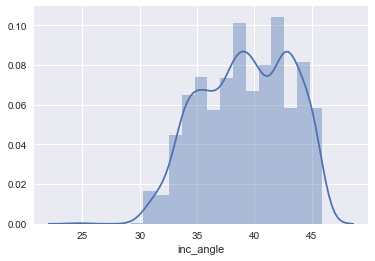

In [9]:
sns.distplot(trainData['inc_angle'])
plt.show()

#### combine interesting data

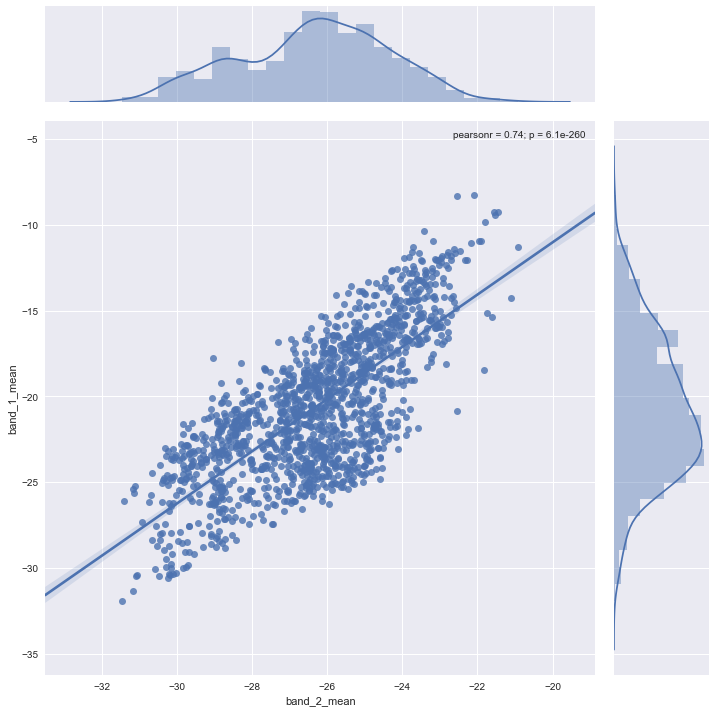

In [10]:
g = sns.jointplot("band_2_mean", "band_1_mean", data=trainData, kind="reg", size=10)

In [36]:
# get max value of angle
maxVal = trainData['inc_angle'].max()
minVal = trainData['inc_angle'].min()

# set heat colors
maxClr = [1, 0, 0] # red
minClr = [0, 0, 1] # blue

# get colors for every scan
colors = trainData['inc_angle'].apply(lambda row: happycolors.gradientcolor(minClr, maxClr, minVal, maxVal, row, False))

# lots of lists have been created. gather to one big list of arrays


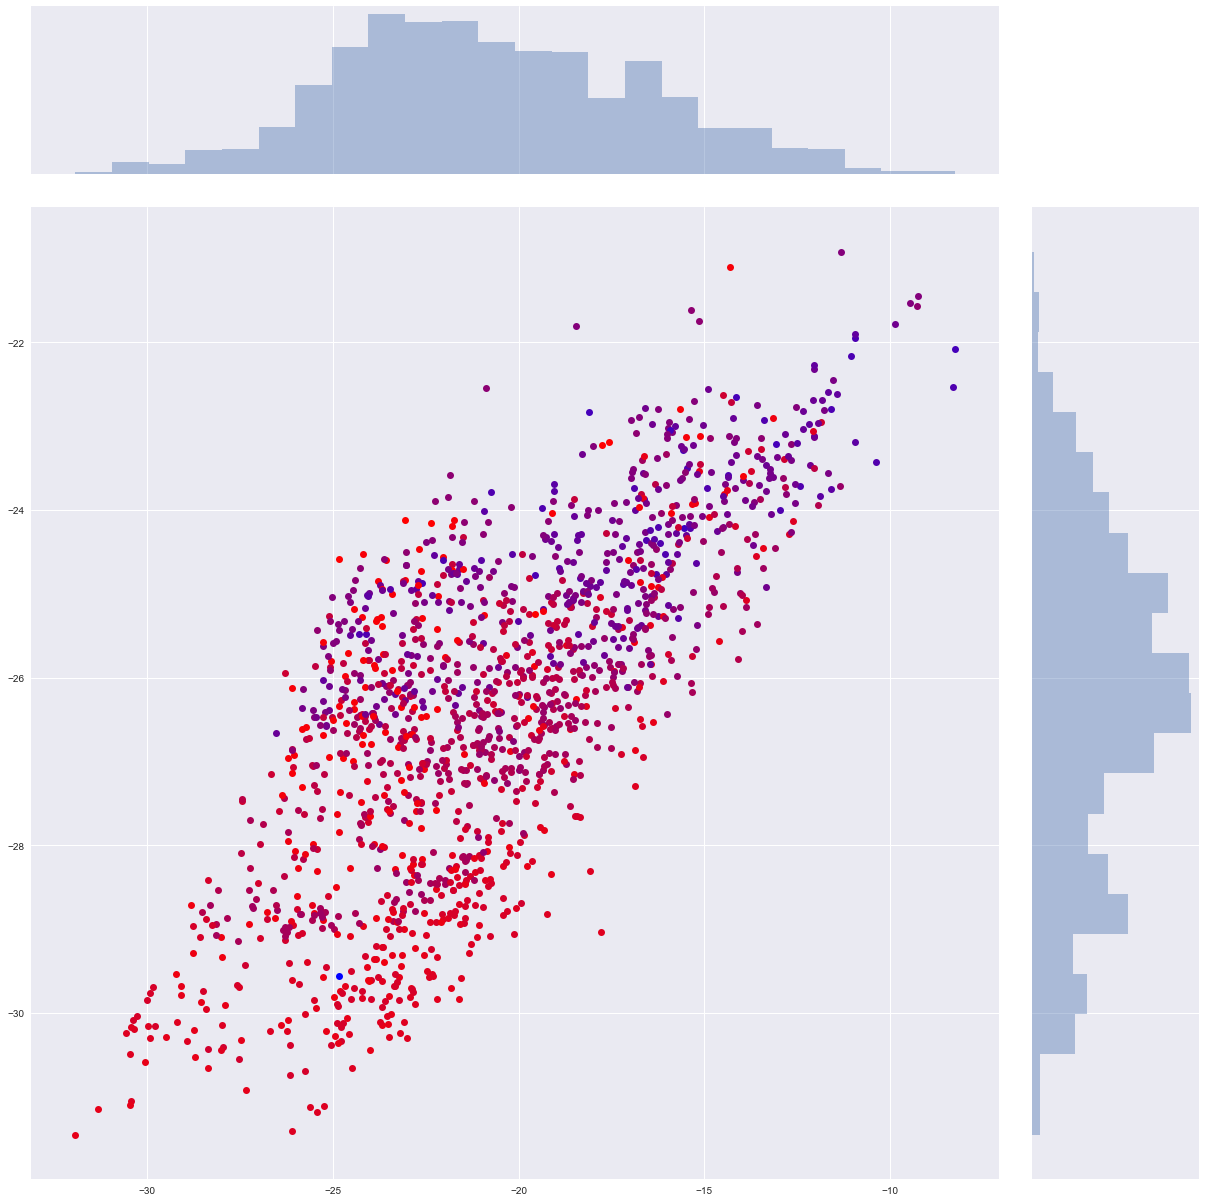

In [77]:
from itertools import product

g = sns.jointplot("band_1_mean", "band_2_mean", data=trainData, stat_func=None, size=17)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

# get max value of angle
maxVal = trainData['inc_angle'].max()
minVal = trainData['inc_angle'].min()

# set heat colors
maxClr = [1, 0, 0] # red
minClr = [0, 0, 1] # blue

# get colors for every scan
color = trainData['inc_angle'].apply(lambda row: happycolors.gradientcolor(minClr, maxClr, minVal, maxVal, row, False))

# lots of lists have been created. unify them.
colors = []
for element in color:
        colors.append(element)

# get column numbers
firstColNum = trainData.columns.get_loc("band_1_mean")
secondColNum = trainData.columns.get_loc("band_2_mean")

#Plot each individual point separately
for i, row in enumerate(trainData.iterrows()):
    g.ax_joint.plot(row[1][firstColNum], 
                    row[1][secondColNum],
                    marker='o',
                    markerfacecolor=colors[i])